# Identify Paths from BOTTLE proposed route

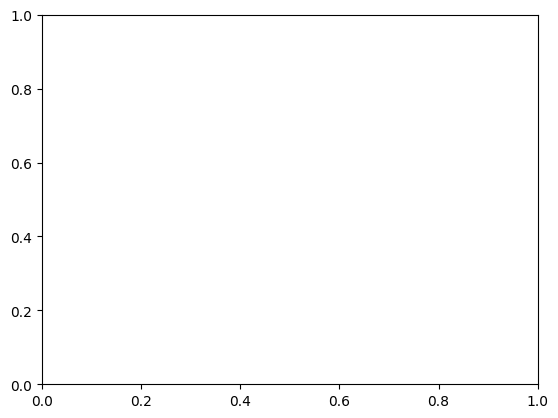

In [1]:
import os
CWD = os.path.abspath("")
os.chdir(CWD)

from minedatabase.pickaxe import Pickaxe
from minedatabase.utils import get_compound_hash
from minedatabase.rules import metacyc_intermediate
from minedatabase.filters import (
    SimilarityFilter,
    SimilaritySamplingFilter,
)

from rdkit.Chem import CanonSmiles

str_dir = "../src/starters_targets_rules/"

input_cpds = str_dir + "succinate.csv"
target_cpds = str_dir + "mvacid.csv"
_, coreactant_list, rule_name = metacyc_intermediate(
    fraction_coverage=1
    # n_rules=5
)
rule_list = str_dir + 'JN3604IMT_rules.tsv'

In [2]:
pk = Pickaxe(
        coreactant_list=coreactant_list,
        rule_list=rule_list,
        errors=True,
        quiet=True,
        filter_after_final_gen=True,
    )

pk.load_compound_set(compound_file=input_cpds)

pk.load_targets(target_cpds)
tani_filter = False # True
tani_threshold = [0, 0, 0.3, 0.3, 0.3]
increasing_tani = False

tani_sample = True # False
sample_size = 1000 # 10
weight = None # 5

# Apply filters
if tani_filter:
    taniFilter = SimilarityFilter(
        crit_similarity=tani_threshold, increasing_similarity=increasing_tani
    )
    pk.filters.append(taniFilter)

if tani_sample:
    taniSampleFilter = SimilaritySamplingFilter(
        sample_size=sample_size, weight=weight
    )
    pk.filters.append(taniSampleFilter)
    pass

----------------------------------------
Intializing pickaxe object


RDKit WARNING: [07:22:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [07:22:20] WARNING: not removing hydrogen atom without neighbors
[07:22:20] WARNING: not removing hydrogen atom without neighbors
[07:22:20] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded



In [3]:
# Transform compounds (the main step)
processes = 50
generations = 4
pk.transform_all(processes, generations)
pk.prune_network_to_targets()

----------------------------------------
Filtering Generation 0

Sampling 1000 Compounds Based on a Weighted Similarity Distribution
Filtering Generation 0 via Similarity Sampling.
-- Number to sample is less than number of compounds. Returning all compounds.
num sampled =  1
1 of 1 compounds selected after Similarity Sampling of generation 0--took 0.0008094310760498047s.

Done filtering Generation 0
----------------------------------------

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 5.73078465461731 s and contains:
		59 new compounds
		70 new reactions

Done expanding Generation: 1.
----------------------------------------

----------------------------------------
Filtering Generation 1

Sampling 1000 Compounds Based on a Weighted Similarity Distribution
Filtering Generation 1 via Similarity Sampling.
-- Number to sample is less than number of compounds. Returning all compounds.
num sampled =  59
59 of 59 

In [6]:
# bad_es = []
# for i, vals in pk.compounds.items():
#     try:
#         pk.compounds[i]["SMILES"] = CanonSmiles(vals["SMILES"])
#     except BaseException as e:
#         bad_es.append(vals["SMILES"])
#         pk.compounds[i]["SMILES"] = vals["SMILES"].replace("*", "")
        

In [4]:
pk.pickle_pickaxe("/projects/b1039/spn1560/bottle/succinate_to_mvacid_gen_4_tan_sample_n_samples_1000.pk") # Save results

In [5]:
pk.load_pickled_pickaxe("/projects/b1039/spn1560/bottle/succinate_to_mvacid_gen_4_tan_sample_n_samples_1000.pk") # Load results

Loading /projects/b1039/spn1560/bottle/succinate_to_mvacid_gen_4_tan_sample_n_samples_1000.pk pickled data.
Loaded 89758 compounds
Loaded 106853 reactions
Loaded 3604 operators
Loaded 1 targets
Took 5.479995250701904
